In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

## Exercise: Income and Growth Across Countries

The data file `cross_country_gdp_per_capita.csv` contains annual data on GDP per capita for over 100 countries and is available here: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/cross-country-production/csv/cross_country_gdp_per_capita.csv. The data are was constructed from the Penn World Table (https://www.rug.nl/ggdc/productivity/pwt/).

In this exercise, you will:

1. Analyze some basic facts about GDP per capita across the world.
2. Compute the average annual growth rate of GDP per capita for each country in the data.
3. Compute a linear regression of average GDP per capita growth on GDP per capita in the initial year.

Follow the instructions in the following cells.

### Part (a)

In [2]:
# Create a variable called 'data' that stores the data in the file 'cross_country_gdp_per_capita.csv' in a DataFrame
# Make sure that 'Year', the left-most column of the data, is set to be the index column
data=pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/cross-country-production/csv/cross_country_gdp_per_capita.csv',index_col=0,parse_dates=True)


# Print the first 5 rows of data
data.head(5)

,Algeria - DZA,Argentina - ARG,Australia - AUS,Austria - AUT,Bangladesh - BGD,Barbados - BRB,Belgium - BEL,Benin - BEN,Bolivia (Plurinational State of) - BOL,Botswana - BWA,...,Tunisia - TUN,Turkey - TUR,U.R. of Tanzania: Mainland - TZA,Uganda - UGA,United Kingdom - GBR,United States - USA,Uruguay - URY,Venezuela (Bolivarian Republic of) - VEN,Zambia - ZMB,Zimbabwe - ZWE
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,10835.013633,3211.930776,15799.374511,10212.925212,1563.253366,9351.603196,10628.077353,1780.014036,1958.690589,513.302543,...,1871.893469,5130.867881,1161.468506,867.974864,13277.785336,19079.524915,7470.180074,7649.257843,1838.128861,2448.016819
1961-01-01,9263.024993,3262.946915,15902.039335,10715.417912,1521.760195,9709.269726,11145.608203,1762.469851,1977.905892,544.948259,...,1898.761129,5082.403742,1159.658115,859.945213,13502.722846,19246.521317,7475.181317,7612.769444,1842.407954,2509.457180
1962-01-01,5283.863349,3271.116333,16466.982540,10950.801769,1580.896806,10035.758090,11681.076150,1676.566399,2005.947731,577.503224,...,1885.964205,5268.025228,1235.448666,855.533041,13551.653640,20092.721039,7465.918145,7885.256390,1746.632752,2415.856449
1963-01-01,5965.947146,3109.235438,17306.359633,11330.010681,1646.486474,9852.283413,12054.987566,1731.405529,2089.380990,594.655498,...,2032.913729,5642.660588,1288.067537,849.658115,13989.652743,20687.402596,7232.202019,8175.083481,1783.751559,2397.569223
1964-01-01,6087.378183,3214.965520,17813.994185,11792.523817,1604.166960,9764.132887,12765.856174,1785.878635,2168.143080,623.269084,...,2046.015150,5693.903199,1446.366780,894.702738,14730.599328,21628.648863,7426.666257,8764.632647,1978.835032,2263.463613


In [3]:
# Each column contains data for a specific country. Print the number of countries (e.g., the length of data.columns)
len(data.columns)

104

In [4]:
# Each column contains data for a specific year. Print the number of years (e.g., the length of data.index)
len(data.index)

60

In [5]:
# Print the values of the initial year and the final year in the data
data.iloc[0]

Algeria - DZA                               10835.013633
Argentina - ARG                              3211.930776
Australia - AUS                             15799.374511
Austria - AUT                               10212.925212
Bangladesh - BGD                             1563.253366
                                                ...     
United States - USA                         19079.524915
Uruguay - URY                                7470.180074
Venezuela (Bolivarian Republic of) - VEN     7649.257843
Zambia - ZMB                                 1838.128861
Zimbabwe - ZWE                               2448.016819
Name: 1960-01-01 00:00:00, Length: 104, dtype: float64

In [6]:
data.iloc[-1]

Algeria - DZA                               11787.492764
Argentina - ARG                             21826.837555
Australia - AUS                             54147.007455
Austria - AUT                               53344.506852
Bangladesh - BGD                             4658.009856
                                                ...     
United States - USA                         62588.999726
Uruguay - URY                               20545.422919
Venezuela (Bolivarian Republic of) - VEN      251.092365
Zambia - ZMB                                 3179.195984
Zimbabwe - ZWE                               2787.658975
Name: 2019-01-01 00:00:00, Length: 104, dtype: float64

In [7]:
# Create a variable called 'data_initial' that is equal to the first row of the data DataFrame
data_initial=data.iloc[0]

# Create a variable called 'data_final' that is equal to the last row of the data DataFrame
data_final=data.iloc[-1]

In [8]:
# Use the sort_values() method of data_initial to sort the Series in ascending order.
data_initial.sort_values(ascending=True)

# Print the name and GDP per capita of the countries with the 10 lowest GDPs per capita in the initial year of the data
data_initial.sort_values(ascending=True).head(10)

Botswana - BWA       513.302543
Ethiopia - ETH       536.422488
Mozambique - MOZ     659.204280
El Salvador - SLV    745.048021
Burundi - BDI        754.992174
Nepal - NPL          761.835880
Egypt - EGY          766.933912
Mali - MLI           776.597797
Malta - MLT          857.511909
Uganda - UGA         867.974864
Name: 1960-01-01 00:00:00, dtype: float64

In [39]:
# Use the sort_values() method of data_final to sort the Series in ascending order.

data_final.sort_values(ascending=True)

# Print the name and GDP per capita of the countries with the 10 lowest GDPs per capita in the final year of the data
data_final.sort_values(ascending=True).head(10)



Venezuela (Bolivarian Republic of) - VEN     251.092365
Burundi - BDI                                790.045989
Central African Republic - CAF               978.349365
D.R. of the Congo - COD                     1021.693694
Malawi - MWI                                1161.380656
Niger - NER                                 1210.878154
Mozambique - MOZ                            1228.870498
Madagascar - MDG                            1539.062941
Haiti - HTI                                 1554.021210
Uganda - UGA                                2092.149157
Name: 2019-01-01 00:00:00, dtype: float64

In [10]:
# Print the names of the countries that are among the 10 with lowest GDPs per capita in BOTH the initial year and 
# the final year.

print('Uganda - UGA' +', ' 'Burundi - BDI ')

Uganda - UGA, Burundi - BDI 


In [11]:
# Print the name and GDP per capita of the countries with the 10 highest GDPs per capita in the initial year of the data

data_initial.sort_values(ascending=True).tail(10)


Netherlands - NLD       13113.134947
United Kingdom - GBR    13277.785336
Sweden - SWE            13470.279252
Denmark - DNK           13568.789123
New Zealand - NZL       14358.213239
Canada - CAN            15393.973193
Australia - AUS         15799.374511
Luxembourg - LUX        18467.474476
United States - USA     19079.524915
Switzerland - CHE       23249.107345
Name: 1960-01-01 00:00:00, dtype: float64

In [12]:
# Print the name and GDP per capita of the countries with the 10 highest GDPs per capita in the final year of the data

data_final.sort_values(ascending=True).tail(10)


Denmark - DNK                  54027.148192
Australia - AUS                54147.007455
China, Hong Kong SAR - HKG     54810.020072
Netherlands - NLD              55569.439871
United States - USA            62588.999726
Norway - NOR                   73668.787811
Switzerland - CHE              75298.817475
Singapore - SGP                82336.341773
Luxembourg - LUX               90479.404038
Ireland - IRL                 102622.448922
Name: 2019-01-01 00:00:00, dtype: float64

In [13]:
# Print the names of the countries that are among the 10 with highest GDPs per capita in BOTH the initial year
# and the final year

print('Denmark - DNK' +', ' 'Luxembourg - LUX '+', ' 'United States - USA'+', ' 'Netherlands - NLD' +', ' 'Australia - AUS '+', ' ' Switzerland - CHE')



Denmark - DNK, Luxembourg - LUX , United States - USA, Netherlands - NLD, Australia - AUS ,  Switzerland - CHE


### Part (b)

Let $y_t$ denotes GDP per capita for some country in some year $t$ and let $g$ denotes the average annual growth in GDP per capita between years 0 and $T$. $g$ is defined by:
\begin{align}
y_T & = (1+g)^T y_0
\end{align}
which implies:
\begin{align}
g & = \left(\frac{y_T}{y_0}\right)^{1/T} - 1
\end{align}
We can use this equation to compute the aveage growth rate of GDP per capita for each country in our data. Note that for our data, $T$ is equal to `len(data.index)-1`.

In [31]:
# Create a variable called 'growth_rates' that contains the average growth rate of each country in the data.
# NOTE: You do not need to re-sort the variables data_initial and data_final. If their indices don't align,
# Pandas will automatically sort their indices alphabetically.

T=len(data.index)-1 
growth_rates=(data_final/data_initial)**(1/T)-1

# Use the sort_values() method of growth_rates to sort the Series in ascending order.

growth_rates.sort_values(ascending=True)


Venezuela (Bolivarian Republic of) - VEN   -0.056263
D.R. of the Congo - COD                    -0.018001
Niger - NER                                -0.008539
Central African Republic - CAF             -0.007771
Gambia - GMB                               -0.002642
                                              ...   
Romania - ROU                               0.050583
Singapore - SGP                             0.059211
Botswana - BWA                              0.060565
Republic of Korea - KOR                     0.061385
Malta - MLT                                 0.066797
Length: 104, dtype: float64

In [32]:
# Print the average growth rate of GDP per capita for all countries rounded to 4 decimal places
print(round(growth_rates.mean(),4))

0.0219


In [33]:
# Print the standard deviation of the growth rate of GDP per capita for all countries rounded to 4 decimal places
print(round(np.std(growth_rates),4))

0.0169


In [35]:
# Print the name and growth rates of the countries with the 10 lowest growth rates of GDP per capita
print(growth_rates.sort_values(ascending=False).tail(10))

Algeria - DZA                               0.001429
Haiti - HTI                                 0.000836
Burundi - BDI                               0.000770
Nicaragua - NIC                             0.000593
Madagascar - MDG                           -0.000755
Gambia - GMB                               -0.002642
Central African Republic - CAF             -0.007771
Niger - NER                                -0.008539
D.R. of the Congo - COD                    -0.018001
Venezuela (Bolivarian Republic of) - VEN   -0.056263
dtype: float64


In [34]:
# Print the name and growth rates of the countries with the 10 highest growth rates of GDP per capita
print(growth_rates.sort_values(ascending=False).head(10))

Malta - MLT                0.066797
Republic of Korea - KOR    0.061385
Botswana - BWA             0.060565
Singapore - SGP            0.059211
Romania - ROU              0.050583
Taiwan - TWN               0.050149
Egypt - EGY                0.047807
Ireland - IRL              0.047347
China - CHN                0.046011
Thailand - THA             0.045992
dtype: float64


In [19]:
data_initial.sort_values(ascending=True).head(10)

Botswana - BWA       513.302543
Ethiopia - ETH       536.422488
Mozambique - MOZ     659.204280
El Salvador - SLV    745.048021
Burundi - BDI        754.992174
Nepal - NPL          761.835880
Egypt - EGY          766.933912
Mali - MLI           776.597797
Malta - MLT          857.511909
Uganda - UGA         867.974864
Name: 1960-01-01 00:00:00, dtype: float64

In [20]:
# Print the names of the countries that were BOTH among the 10 with lowest GDPs per capita in the initial year and 
# among the 10 with the highest growth of GDP per capita.
print('Botswana - BWA ' +', ' 'Egypt - EGY '+', ' 'Malta - MLT')



Botswana - BWA , Egypt - EGY , Malta - MLT


Text(0.5, 1.0, 'Scatter plot of GDP Per capita and Average growth rate of GDP per capitaS ')

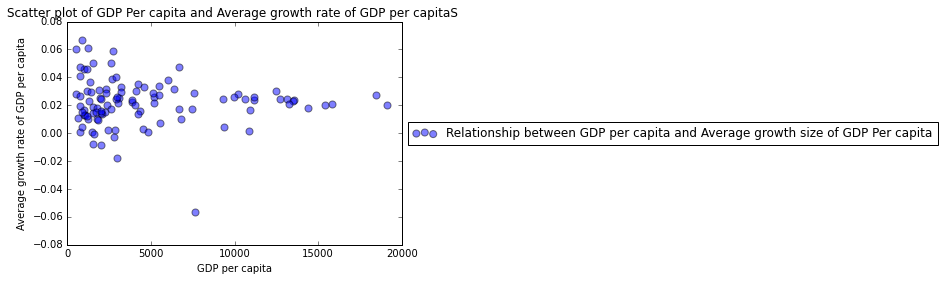

In [36]:
# Use the sort_index() method of data_initial to alphabetize the index [e.g., data_initial = data_initial.sort_index()]
data_initial = data_initial.sort_index()

# Use the sort_index() method of growth_rates to alphabetize the index
growth_rates = growth_rates.sort_index()

# Construct a scatter plot with:
#     1. GDP per capita in the initial year on the horizontal axis
#     2. Average growth rate of GDP per capita on the vertical axis
#     3. Size of scatter plot markers at least 50
#     4. Opacity of scatter plot markers no greater than 0.5
#     5. x-axis limit: [0,20000]
#     6. Suitable title and labels for the axes


fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(data_initial,growth_rates,s=50,alpha=0.5,label='Relationship between GDP per capita and Average growth size of GDP Per capita')
ax.set_xlim([0,20000])
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Average growth rate of GDP per capita')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Scatter plot of GDP Per capita and Average growth rate of GDP per capitaS ')




**Question**

1. Describe in words the relationship between GDP per capita in the initial year and average growth of GDP per capita. How is the relationship different for low income countries and high income countries?

**Answer**

1.  In general, the relationship between GDP per capita in the initial year and average growth of GDP per capita maintains a stable relationship where countries with higher GDP per capita tends to have relative constant average growth rate of GDP per capita. and for low income countries compared with high income countries it will be more likely to have a higher average growth rate of GDP per capita

### Part (c)

In this part you will use OLS to estimate the relationship between GDP per capita in the initial year and average growth of GDP per capita.

\begin{align}
g_i & = \beta_0 + \beta_{\text{1}}y_i + \epsilon_i,
\end{align}

where $g_i$ is the average annual growth rate of country $i$, $y_i$ is country $i$'s initial GDP per capita, and $\epsilon_i$ is the residual of the regression.

In [37]:


# Create a variable called 'y' that is equal to the average growth rates of the countries
y=growth_rates


# Create a variable called x' that is equal to the GDP per capita of the countries in the initial year
x=data_initial

# Use the Statsmodels function add_constant() to add a constant column to the variable x
x=sm.add_constant(x)

# Create a variable called 'model' equal to the output of the Statsmodels OLS function regressing y upon x
model=sm.OLS(y,x)

# Create a variable called 'results' that stores the fitted model (i.e., the output of the fit() method of model)
results=model.fit()

# Print the summary of results generated by the summary() method of results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3185
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.574
Time:                        10:24:25   Log-Likelihood:                 277.14
No. Observations:                 104   AIC:                            -550.3
Df Residuals:                     102   BIC:                            -545.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0229    

**Questions**

1. Interpret the estimate for the coefficient on $y_i$.
2. Interpret the estimate for the constant. Where did we see this number earlier?
3. Interpret the R-squared of the regression.

**Answers**

1.  average growth rates of the countries is expected to decrease 1.971*10^(-7) as one additional unit increase in GDP per capita of the countries in the initial year

2.  The intepretation of the constant is that when GDP per capita of the countries in the initial year equals 0, the expected average growth rates of the countries tends to be 0.0229

3.  R-squared shows 3% of the variaton of average growth rates of the countries can be explained by GDP per capita of the countries in the initial year

## Exercise: Income and Growth Across US States

The data file `state_income_data.csv` contains annual data on income per capita for the 48 continental states, Washington D.C., and the United States as a whole and is available here: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/us-convergence/csv/state_income_data.csv. 

In this exercise, you will:

1. Analyze some basic facts about income per capita among US states.
2. Compute the average annual growth rate of income per capita for each state in the data.
3. Compute a linear regression of average income per capita growth on income per capita in the initial year.

Follow the instructions in the following cells.

### Part (a)

In [23]:
# Create a variable called 'state_df' that stores the data in the file 'cross_country_gdp_pc.csv' in a DataFrame
# Make sure that 'Year', the left-most column of the data, is set to be the index column
state_df=pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/us-convergence/csv/state_income_data.csv',index_col=0,parse_dates=True)

# Print the first 5 rows of data
state_df.head()


,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,TN,TX,UT,United States,VA,VT,WA,WI,WV,WY
1840-01-01,962.306222,1234.657040,NaN,NaN,NaN,1652.261627,NaN,1234.657040,1252.813761,1034.933107,...,853.365895,NaN,NaN,1180.186876,980.462943,1180.186876,NaN,1452.537694,980.462943,NaN
1880-01-01,1129.751540,1250.796347,4781.269909,3913.782119,4458.483755,2945.423657,NaN,2178.806541,968.358463,1129.751540,...,1049.055001,1210.448078,1634.104906,1916.542790,1028.880866,2098.110002,2824.378849,1896.368656,1089.403270,3106.816734
1900-01-01,1350.860055,1372.648121,4357.613081,3943.639839,3812.911446,3398.938203,NaN,2723.508176,1459.800382,1220.131663,...,1329.071990,1830.197494,2483.839456,2462.051391,1438.012317,2570.991718,3943.639839,2331.322999,1721.257167,5163.771501
1929-01-01,3387.131026,3217.243576,6349.543427,10554.257804,6699.936292,10925.886600,14058.186451,10947.122531,5510.724145,3641.962200,...,3960.501168,5032.915693,5818.645148,7421.957953,4618.815035,6689.318327,7857.294542,7114.036951,4873.646209,7135.272882
1930-01-01,2898.710460,2468.863661,5709.247217,9798.302656,6326.463132,10217.127742,14482.530585,9456.629560,5158.161578,3339.578971,...,3537.969801,4485.837099,5444.726110,6844.483633,4265.402844,6304.419707,7241.265293,6447.701973,4485.837099,6414.636835


The DataFrame method `dropna()` returns a DataFrame that omits rows that contain missing (NaN means *not a number*) values. The following command will remove the rows with missing values from the DataFrame `df`:

    df =  df.dropna()
    
The DataFrame method `drop()` returns a DataFrame that omits rows or columns with a given label. The following command will remove the column named `'LABEL'` from the DataFrame `df`:   
   
    df = df.drop('LABEL',axis=1)
    
The argument `axis=1` means to look among the columns for `'LABEL'`. If we had wanted to remove a row with the index value `'LABEL'`, then the axis argument would have been: `axis=0`.

In [24]:
# Remove the rows with missing data from state_df
state_df=state_df.dropna()

# Remove the column named 'United States' from state_df

state_df=state_df.drop(['United States'],axis=1)

# Set state_df equal to itself divided by 1000 so that its units are in thousands of dollars
state_df=state_df/1000

# Print the first 5 rows of data
state_df.head()

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1929-01-01,3.387131,3.217244,6.349543,10.554258,6.699936,10.925887,14.058186,10.947123,5.510724,3.641962,...,4.406456,3.960501,5.032916,5.818645,4.618815,6.689318,7.857295,7.114037,4.873646,7.135273
1930-01-01,2.898710,2.468864,5.709247,9.798303,6.326463,10.217128,14.482531,9.456630,5.158162,3.339579,...,3.934751,3.537970,4.485837,5.444726,4.265403,6.304420,7.241265,6.447702,4.485837,6.414637
1931-01-01,2.702371,2.542685,5.281906,9.249478,5.797814,9.912787,15.391230,9.531999,4.876551,3.120010,...,2.972608,3.353396,4.237809,4.569463,4.557180,5.785530,6.559391,5.760963,4.348360,5.859231
1932-01-01,2.212020,2.114636,4.479688,8.124652,4.966611,8.722871,15.400668,8.222037,4.410128,2.740679,...,2.629382,2.698943,3.644964,4.229271,3.978854,5.050083,5.592654,5.036171,3.575403,5.217028
1933-01-01,2.346545,2.189154,4.421233,7.869509,5.050794,8.456145,13.521248,8.098440,4.135069,2.890256,...,1.945915,2.875948,3.634282,4.249535,4.092145,4.821863,5.379883,4.778938,3.705823,5.322650


In [25]:
# Create a variable called 'state_growth_rates' that contains the average growth rate of each state in the data.
T=len(state_df.index)-1
state_growth_rates=(state_df.iloc[-1]/state_df.iloc[0])**(1/T)-1


Text(0.5, 1.0, 'Scatter plot of Income per capita in the initial year and Average growth rate of income per capita ')

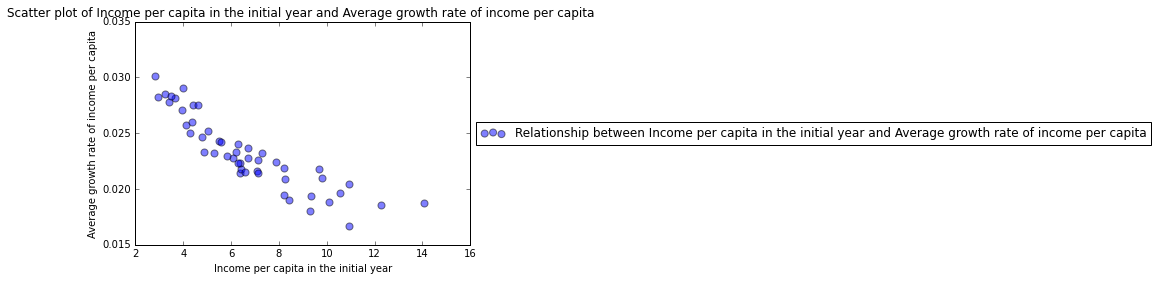

In [26]:
# Construct a scatter plot with:
#     1. Income per capita in the initial year on the horizontal axis
#     2. Average growth rate of income per capita on the vertical axis
#     3. Size of scatter plot markers at least 50
#     4. Opacity of scatter plot markers no greater than 0.5
#     5. y-axis limit: [0.015,0.035]
#     6. Suitable title and labels for the axes

fig=plt.figure()
ax1=fig.add_subplot()
ax1.scatter(state_df.iloc[0],state_growth_rates,s=50,alpha=0.5,label='Relationship between Income per capita in the initial year and Average growth rate of income per capita')





# Create axis 1 and plot with title

ax1.set_ylim([0.015,0.035])
ax1.set_xlabel('Income per capita in the initial year')
ax1.set_ylabel('Average growth rate of income per capita')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_title('Scatter plot of Income per capita in the initial year and Average growth rate of income per capita ')



### Part (b)

Like you did for the country data above, use OLS to estimate the relationship between income per capita in the initial year and average growth of income per capita.

\begin{align}
g_i & = \beta_0 + \beta_{\text{1}}y_i + \epsilon_i,
\end{align}

where $g_i$ is the average annual growth rate of country $i$, $y_i$ is state $i$'s initial income per capita, and $\epsilon_i$ is the residual of the regression.

In [27]:
# Create a variable called 'y' that is equal to the average growth rates of the states
y=state_growth_rates

# Create a variable called x' that is equal to the income per capita of the states in the initial year
x=state_df.iloc[0]

# Use the Statsmodels function add_constant() to add a constant column to the variable x
x=sm.add_constant(x)

# Create a variable called 'model' equal to the output of the Statsmodels OLS function regressing y upon x
model=sm.OLS(y,x)

# Create a variable called 'results' that stores the fitted model (i.e., the output of the fit() method of model)
results=model.fit()

# Print the summary of results generated by the summary() method of results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     181.3
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           9.59e-18
Time:                        10:21:22   Log-Likelihood:                 250.17
No. Observations:                  49   AIC:                            -496.3
Df Residuals:                      47   BIC:                            -492.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0307    

**Questions**

1. Interpret the estimate for the coefficient on $y_i$.
2. Interpret the R-squared of the regression.
3. Why do you think that initial income and average growth are so strongly correlated in the state data but not so in the country data? (If you're not sure, referesh your knowledge about the difference between *conditional* and *unconditional* convergence: https://en.wikipedia.org/wiki/Convergence_(economics)#Types_of_Convergence)

**Answers**

1.  Average growth rates of the states is expected to decrease 0.0011=0.11%  as one additional unit increase in income per capita of the states in the initial year


2.  R-squared shows 79.4% of the variaton of average growth rates of the countries can be explained by GDP per capita of the countries in the initial year

3. For my perspective, the reason why the initial income and average groth rate is so strongly correlated in the state data but not so in the country data is that the country's variation among intial income is larger than that when compared with state data.